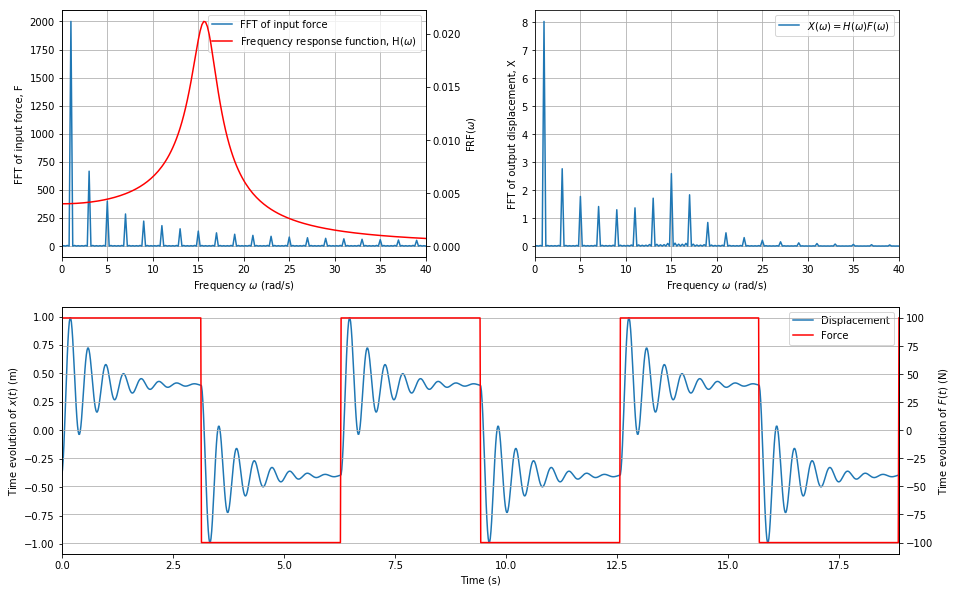

In [17]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal
%matplotlib inline

m = 1.0
c = 3.0
k = 250.0

plt.rcParams['figure.figsize'] = [15, 10]

F0 = 100.0
w = 1.0 # Excitation frequency (rad/s)
NC = 5
NP = 2**11
T = 2*np.pi/w
tf = T*NC

t = np.linspace(0,tf,NP,endpoint = False) # vector de tiempos de muestreo
f = F0*signal.square(w*t)
#f = F0*signal.sawtooth(w*t)

ts = t[1]-t[0]
Fs = 1/ts

F = (np.fft.fft(f))
freq = (2*np.pi)*np.fft.fftfreq(t.shape[-1],ts)

Hw = ( -m*(freq**2) + c*(1j*freq) + k )**(-1)

x = np.fft.ifft(Hw*F)

fig = plt.figure()
ax11a = fig.add_subplot(221)
plt.plot(freq[0:NP/2],np.abs(ts*F[0:NP/2]),label='FFT of input force')
plt.plot([],[],'r',label='Frequency response function, H($\omega$)')
plt.legend(loc='upper right')
plt.xlabel(r'Frequency $\omega$ (rad/s)')
plt.ylabel(r'FFT of input force, F')
plt.grid(True)
plt.xlim((0,40))
ax11b = ax11a.twinx()
plt.subplots_adjust(wspace =0.3) 
plt.plot(freq[0:NP/2],np.abs(Hw[0:NP/2]),'r')
plt.ylabel(r'FRF($\omega$)')


ax21 = fig.add_subplot(222)
plt.plot(freq[0:NP/2],np.abs((Hw*(ts*F))[0:NP/2]),label='$X(\omega)=H(\omega)F(\omega)$')
plt.grid(True)
plt.xlim((0,40))
plt.ylabel(r'FFT of output displacement, X')
plt.xlabel(r'Frequency $\omega$ (rad/s)')
plt.legend(loc='upper right')

ax1 = fig.add_subplot(2,2,(3,4))
ax1.plot(t,x.real,label='Displacement')
ax1.plot([],[],'r',label='Force')
plt.ylabel(r'Time evolution of $x(t)$ (m)')
plt.xlabel(r'Time (s)')
plt.legend(loc='upper right')
plt.xlim((0,3*T))
ax2 = ax1.twinx()
ax2.plot(t,f,'r')
plt.grid(True)
plt.ylabel(r'Time evolution of $F(t)$ (N)');
